In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

In [2]:
import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")

In [25]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [54]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [3]:
results = pd.read_csv('results.csv')

In [4]:
results.head(11)

,Classification Method,Avg Accuracy,Std of Accuracy,sensitivity,specificity,precision,f1_score,Run Time (seconds)
0,Bagging,0.932393,0.083126,0.923009,0.928678,0.914166,0.918566,7799.664311
1,Logistic Regression,0.903878,0.119538,0.900239,0.893094,0.873899,0.886873,135.563693
2,LDA,0.911542,0.113315,0.890176,0.914837,0.895858,0.893008,27.879638
3,QDA,0.700156,0.261882,0.476096,0.876279,0.760016,0.585449,7.823183
4,KNN (k = 3),0.872296,0.124264,0.875709,0.856792,0.834230,0.854466,500.353784
5,KNN (k = 5),0.873255,0.129634,0.885452,0.851038,0.830275,0.856976,532.053210
6,KNN (k = 10),0.871308,0.135097,0.902778,0.834446,0.817776,0.858177,497.390001
7,Decision Tree,0.913431,0.113674,0.916324,0.895612,0.878406,0.896965,37.593733
8,Random Forest,0.934940,0.086889,0.923044,0.932925,0.918866,0.920950,1386.257194
9,SVM,0.851968,0.238390,0.853600,0.844030,0.818315,0.835585,634.703542


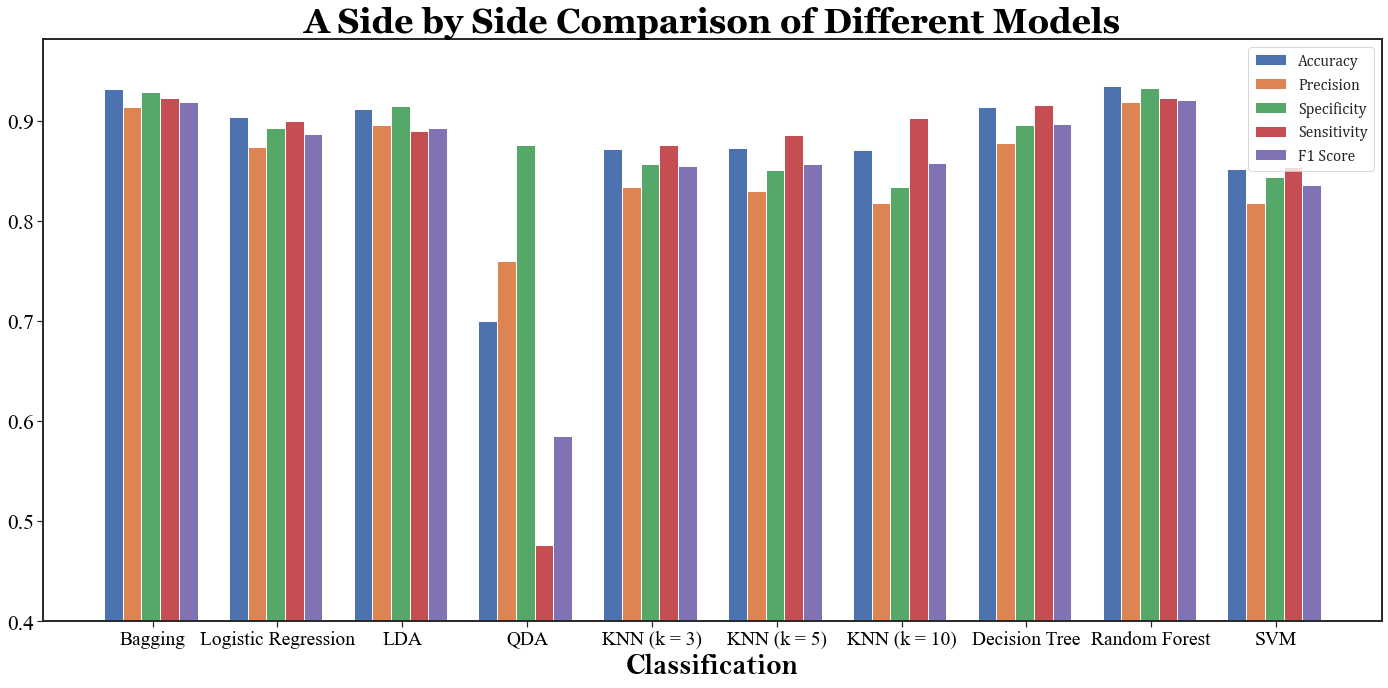

In [109]:
labels = results['Classification Method']
accuracy = results['Avg Accuracy']
f1_score = results['f1_score']
precision = results['precision']
specificity = results['specificity']
sensitivity = results['sensitivity']

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams['axes.linewidth'] = 2

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 21*width/10, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 11*width/10, precision, width, label='Precision')
rects2 = ax.bar(x - width/10, specificity, width, label='Specificity')
rects2 = ax.bar(x + 9*width/10, sensitivity, width, label='Sensitivity')
rects2 = ax.bar(x + 19*width/10, f1_score, width, label='F1 Score')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classification', fontsize = 30, font = "Bell MT", fontweight = 'bold', color = 'black')
ax.set_title('A Side by Side Comparison of Different Models', fontsize = 35, font = "Georgia", color = 'black', fontweight='bold')
ax.set_xticks(x)# set the current tick locations.
ax.set_xticklabels(labels) # set the current tick labels of the x-axis.
ax.legend(fontsize = 16)  # Place a legend on the axes.
plt.yticks(fontsize=22, font = "Times New Roman", color = 'black')
plt.xticks(fontsize = 20, font = "Times New Roman", color = 'black')
plt.ylim(bottom = 0.4)

fig.tight_layout() 
plt.rc('font',family='Cambria')

plt.show()

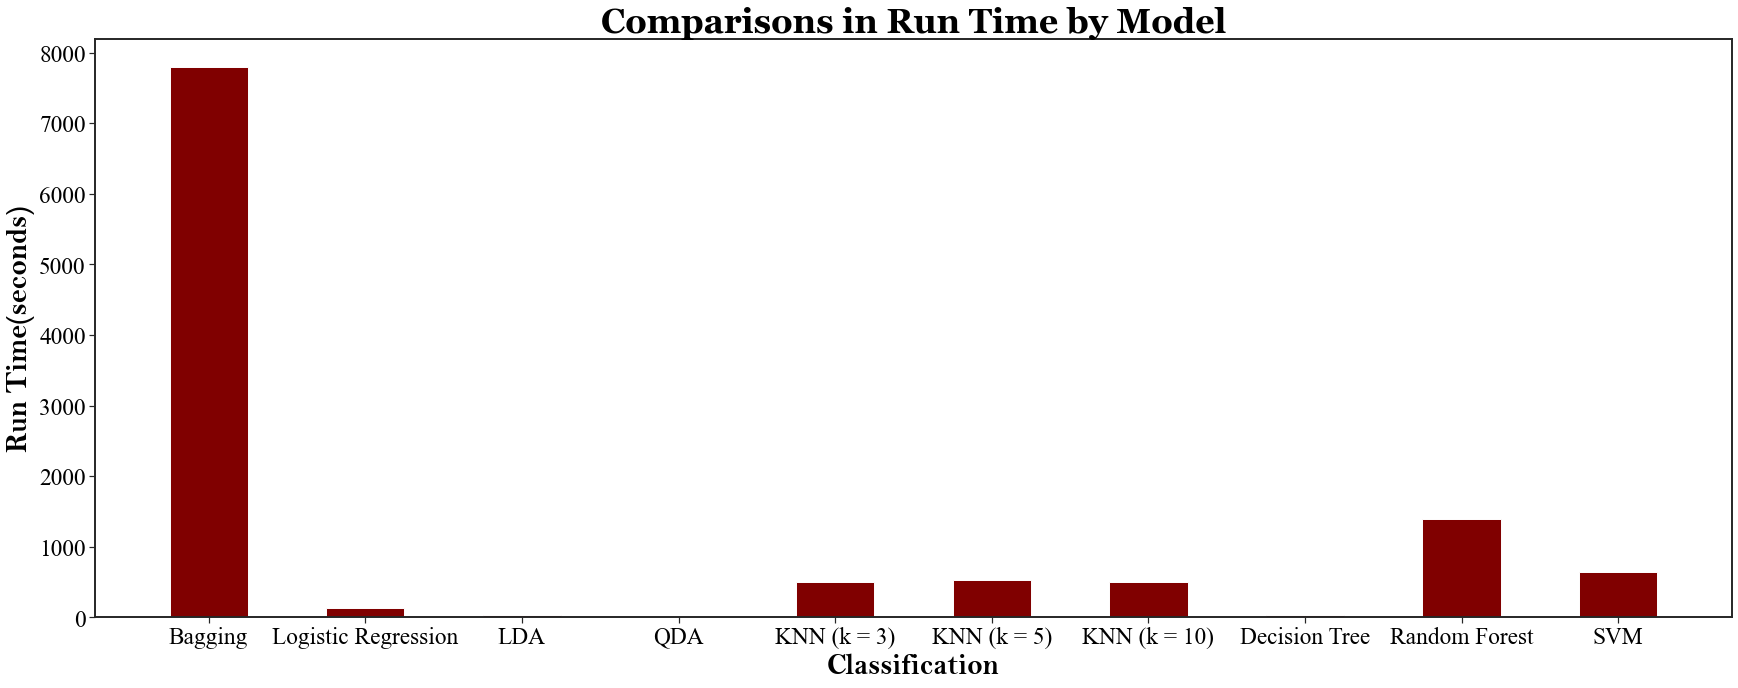

In [110]:
labels = results['Classification Method']
run_time = results['Run Time (seconds)']

plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams['axes.linewidth'] = 2

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, run_time, width, label='Run Time', color = 'maroon')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classification', fontsize = 30, font = "Bell MT", fontweight = 'bold', color = 'black')
ax.set_ylabel('Run Time(seconds)', fontsize = 30, font = "Bell MT",fontweight = 'bold', color = 'black')
ax.set_title('Comparisons in Run Time by Model', fontsize = 35, font = "Georgia", fontweight = 'bold', color = 'black')
ax.set_xticks(x)# set the current tick locations.
ax.set_xticklabels(labels) # set the current tick labels of the x-axis.
plt.yticks(fontsize=24, font = "Times New Roman", color = 'black')
plt.xticks(fontsize = 24, font = "Times New Roman", color = 'black')
fig.tight_layout() 
plt.rc('font',family='Cambria')

plt.show()

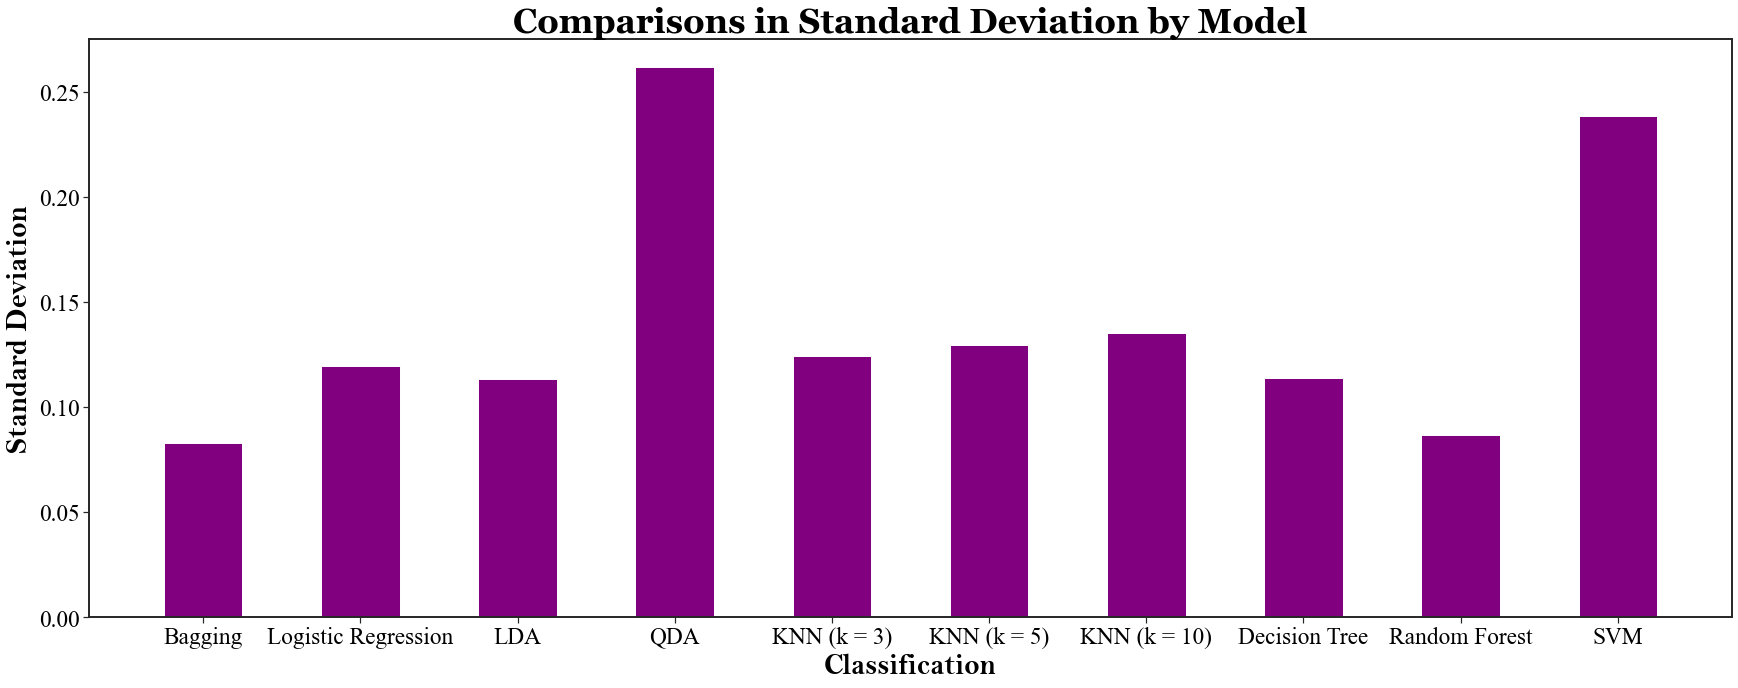

In [111]:
labels = results['Classification Method']
sd = results['Std of Accuracy']

plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams['axes.linewidth'] = 2

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, sd, width, label='Standard Deviation', color = 'purple')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classification', fontsize = 30, font = "Bell MT", fontweight = 'bold', color = 'black')
ax.set_ylabel('Standard Deviation', fontsize = 30, font = "Bell MT",fontweight = 'bold', color = 'black')
ax.set_title('Comparisons in Standard Deviation by Model', fontsize = 35, font = "Georgia", fontweight = 'bold', color = 'black')
ax.set_xticks(x)# set the current tick locations.
ax.set_xticklabels(labels) # set the current tick labels of the x-axis.
plt.yticks(fontsize=24, font = "Times New Roman", color = 'black')
plt.xticks(fontsize = 24, font = "Times New Roman", color = 'black')
fig.tight_layout() 
plt.rc('font',family='Cambria')

plt.show()

In [113]:
results.head(11)

,Classification Method,Avg Accuracy,Std of Accuracy,sensitivity,specificity,precision,f1_score,Run Time (seconds)
0,Bagging,0.932393,0.083126,0.923009,0.928678,0.914166,0.918566,7799.664311
1,Logistic Regression,0.903878,0.119538,0.900239,0.893094,0.873899,0.886873,135.563693
2,LDA,0.911542,0.113315,0.890176,0.914837,0.895858,0.893008,27.879638
3,QDA,0.700156,0.261882,0.476096,0.876279,0.760016,0.585449,7.823183
4,KNN (k = 3),0.872296,0.124264,0.875709,0.856792,0.834230,0.854466,500.353784
5,KNN (k = 5),0.873255,0.129634,0.885452,0.851038,0.830275,0.856976,532.053210
6,KNN (k = 10),0.871308,0.135097,0.902778,0.834446,0.817776,0.858177,497.390001
7,Decision Tree,0.913431,0.113674,0.916324,0.895612,0.878406,0.896965,37.593733
8,Random Forest,0.934940,0.086889,0.923044,0.932925,0.918866,0.920950,1386.257194
9,SVM,0.851968,0.238390,0.853600,0.844030,0.818315,0.835585,634.703542


In [112]:
from tabulate import tabulate

In [122]:
table = [['Classification Method', 'Avg Accuracy', 'Std of Accuracy', 'sensitivity', 'specificity', 'precision', 'f1_score', 'Run Time (seconds)'], results.iloc[0], results.iloc[1], results.iloc[2], results.iloc[3], results.iloc[4], results.iloc[5], results.iloc[6], results.iloc[7], results.iloc[8], results.iloc[9]]

In [123]:
print(tabulate(table))

---------------------  ------------  ---------------  ------------  ------------  ------------  ------------  ------------------
Classification Method  Avg Accuracy  Std of Accuracy  sensitivity   specificity   precision     f1_score      Run Time (seconds)
Bagging                0.9323929153  0.08312627904    0.9230087868  0.9286776498  0.9141664035  0.9185663158  7799.664311
Logistic Regression    0.9038779341  0.1195380285     0.9002385676  0.8930942314  0.8738993855  0.8868734584  135.5636927
LDA                    0.9115415602  0.1133154429     0.8901762094  0.9148369539  0.8958578475  0.8930079914  27.87963829
QDA                    0.7001564919  0.2618823037     0.476095994   0.876279341   0.7600158368  0.5854494492  7.823182735
KNN (k = 3)            0.87229582    0.1242644207     0.8757086168  0.8567915634  0.8342296528  0.8544660452  500.3537839
KNN (k = 5)            0.8732547933  0.1296338606     0.8854520975  0.8510375662  0.8302749754  0.8569762989  532.0532101
KNN (k = 1

In [124]:
print(tabulate(table, headers='firstrow'))

Classification Method      Avg Accuracy    Std of Accuracy    sensitivity    specificity    precision    f1_score    Run Time (seconds)
-----------------------  --------------  -----------------  -------------  -------------  -----------  ----------  --------------------
Bagging                        0.932393          0.0831263       0.923009       0.928678     0.914166    0.918566            7799.66
Logistic Regression            0.903878          0.119538        0.900239       0.893094     0.873899    0.886873             135.564
LDA                            0.911542          0.113315        0.890176       0.914837     0.895858    0.893008              27.8796
QDA                            0.700156          0.261882        0.476096       0.876279     0.760016    0.585449               7.82318
KNN (k = 3)                    0.872296          0.124264        0.875709       0.856792     0.83423     0.854466             500.354
KNN (k = 5)                    0.873255          0.12963

In [125]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+-------------------------+----------------+-------------------+---------------+---------------+-------------+------------+----------------------+
| Classification Method   |   Avg Accuracy |   Std of Accuracy |   sensitivity |   specificity |   precision |   f1_score |   Run Time (seconds) |
+=========================+================+===================+===============+===============+=============+============+======================+
| Bagging                 |       0.932393 |         0.0831263 |      0.923009 |      0.928678 |    0.914166 |   0.918566 |           7799.66    |
+-------------------------+----------------+-------------------+---------------+---------------+-------------+------------+----------------------+
| Logistic Regression     |       0.903878 |         0.119538  |      0.900239 |      0.893094 |    0.873899 |   0.886873 |            135.564   |
+-------------------------+----------------+-------------------+---------------+---------------+-------------+--------

In [126]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════╤════════════════╤═══════════════════╤═══════════════╤═══════════════╤═════════════╤════════════╤══════════════════════╕
│ Classification Method   │   Avg Accuracy │   Std of Accuracy │   sensitivity │   specificity │   precision │   f1_score │   Run Time (seconds) │
╞═════════════════════════╪════════════════╪═══════════════════╪═══════════════╪═══════════════╪═════════════╪════════════╪══════════════════════╡
│ Bagging                 │       0.932393 │         0.0831263 │      0.923009 │      0.928678 │    0.914166 │   0.918566 │           7799.66    │
├─────────────────────────┼────────────────┼───────────────────┼───────────────┼───────────────┼─────────────┼────────────┼──────────────────────┤
│ Logistic Regression     │       0.903878 │         0.119538  │      0.900239 │      0.893094 │    0.873899 │   0.886873 │            135.564   │
├─────────────────────────┼────────────────┼───────────────────┼───────────────┼───────────────┼─────────────┼────────

In [134]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex=range(1,11)))

╒════╤═════════════════════════╤════════════════╤═══════════════════╤═══════════════╤═══════════════╤═════════════╤════════════╤══════════════════════╕
│    │ Classification Method   │   Avg Accuracy │   Std of Accuracy │   sensitivity │   specificity │   precision │   f1_score │   Run Time (seconds) │
╞════╪═════════════════════════╪════════════════╪═══════════════════╪═══════════════╪═══════════════╪═════════════╪════════════╪══════════════════════╡
│  1 │ Bagging                 │       0.932393 │         0.0831263 │      0.923009 │      0.928678 │    0.914166 │   0.918566 │           7799.66    │
├────┼─────────────────────────┼────────────────┼───────────────────┼───────────────┼───────────────┼─────────────┼────────────┼──────────────────────┤
│  2 │ Logistic Regression     │       0.903878 │         0.119538  │      0.900239 │      0.893094 │    0.873899 │   0.886873 │            135.564   │
├────┼─────────────────────────┼────────────────┼───────────────────┼───────────────┼───